In [40]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [41]:
!pip install pandas_datareader


In [42]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [43]:
!pip install yfinance


In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# time stamps
from datetime import datetime


# stocks we'll use for this analysis
tech_list = ['PYPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['PYPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [PYPL, GOOG, MSFT, AMZN]
company_name = ["PAYPAL", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500,AMAZON
2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100,AMAZON
2024-02-08,169.649994,171.429993,168.880005,169.839996,169.839996,42316500,AMAZON
2024-02-09,170.899994,175.000000,170.580002,174.449997,174.449997,56986000,AMAZON
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,AMAZON
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,AMAZON
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,AMAZON
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,AMAZON
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600,AMAZON


In [45]:
# Summary Stats
PYPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,64.431391,65.297722,63.544450,64.424801,64.424801,1.620488e+07
std,6.932033,6.993259,6.861337,6.919832,6.919832,8.370156e+06
min,50.950001,51.445000,50.250000,50.389999,50.389999,4.526402e+06
25%,59.014999,59.805000,58.127499,58.990000,58.990000,1.141340e+07
50%,62.720001,63.439999,61.759998,62.750000,62.750000,1.398060e+07
75%,72.465000,73.605000,71.732498,72.189999,72.189999,1.864500e+07
max,77.709999,79.264999,76.550003,77.330002,77.330002,6.870260e+07


In [46]:
# General info
PYPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-02-21 to 2024-02-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


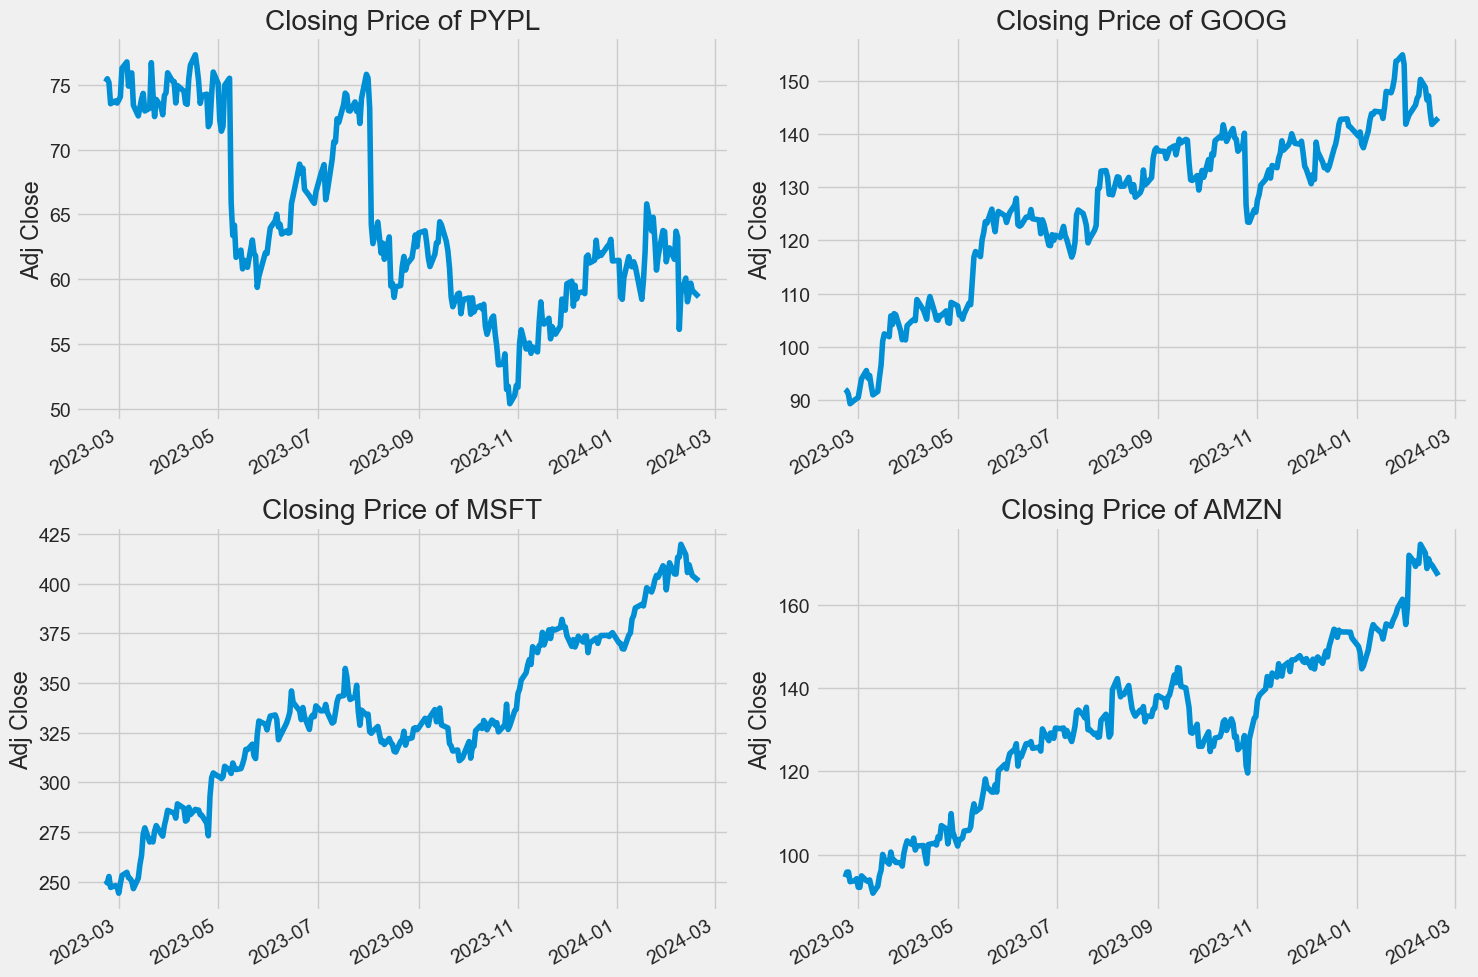

In [47]:
# historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

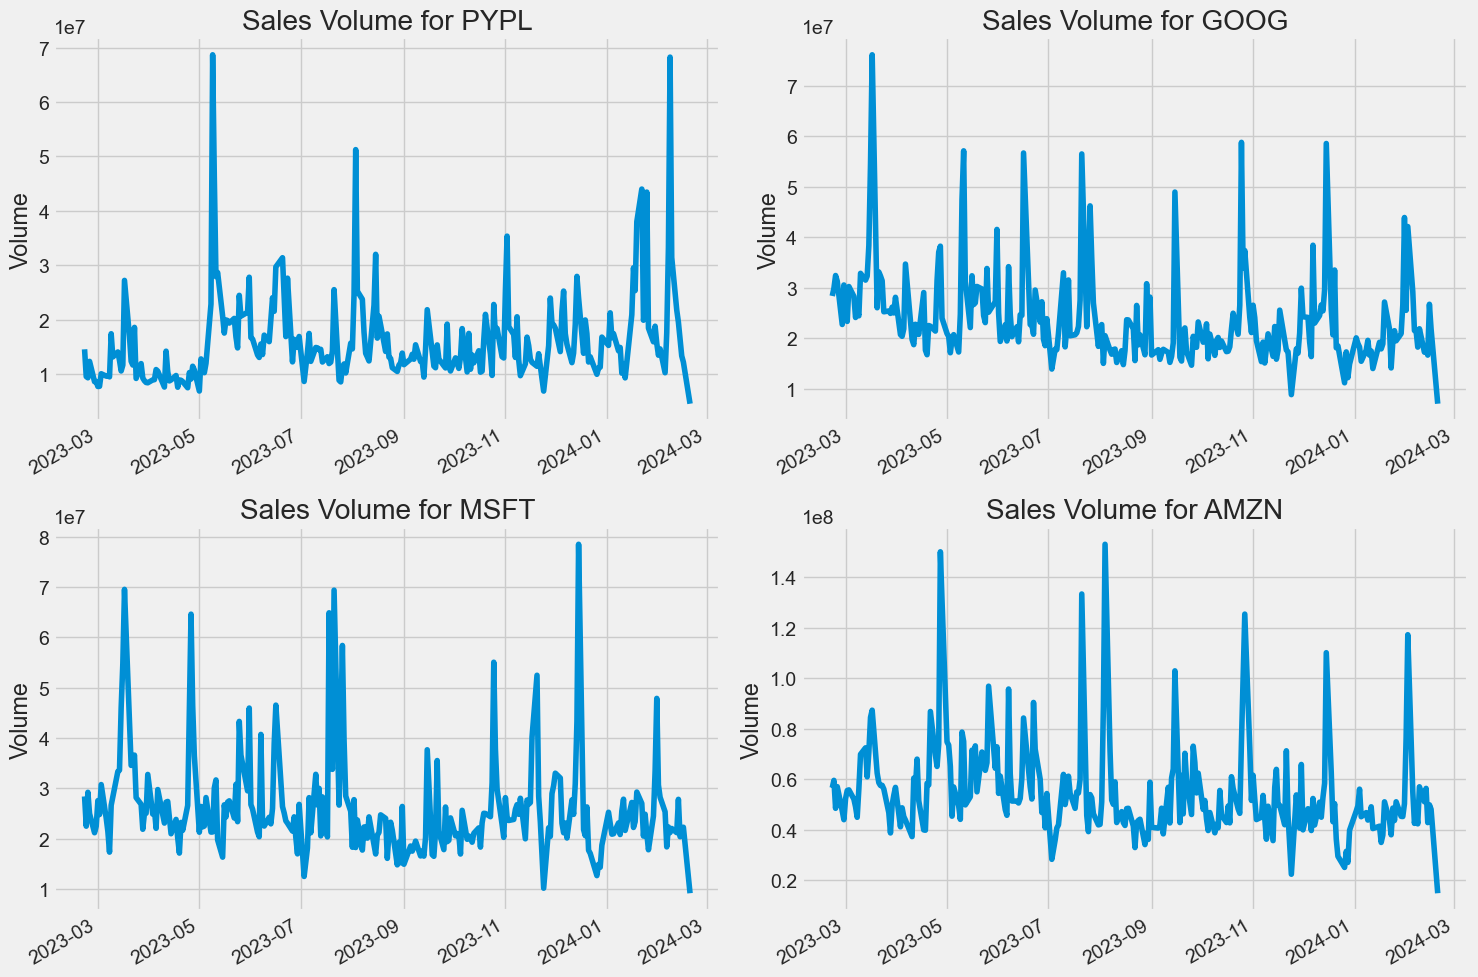

In [48]:
# plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

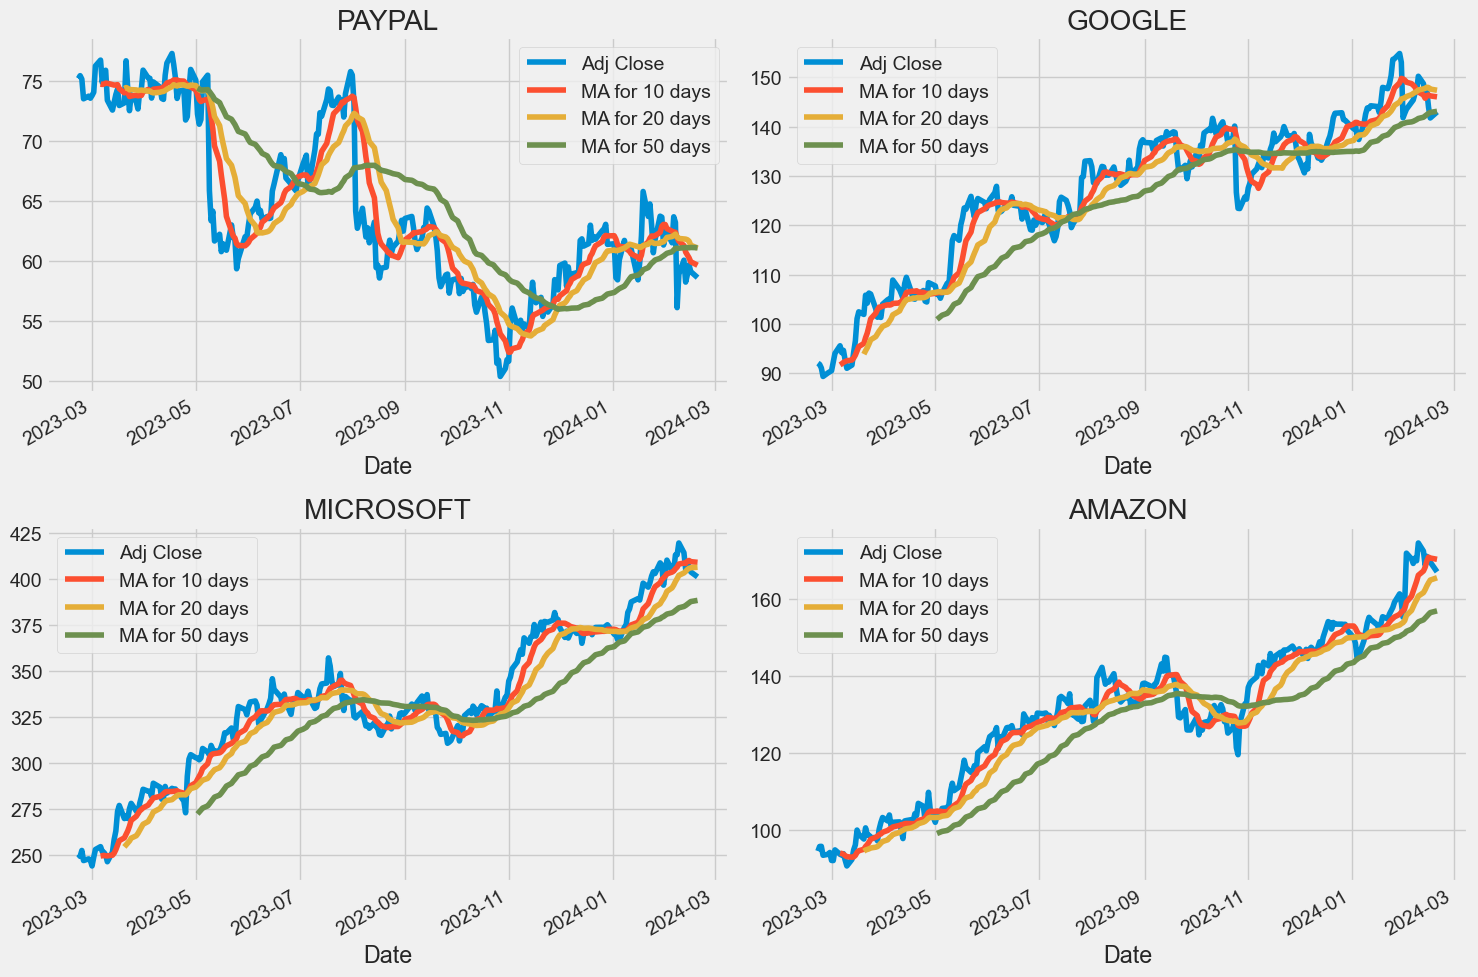

In [49]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

PYPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('PAYPAL')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

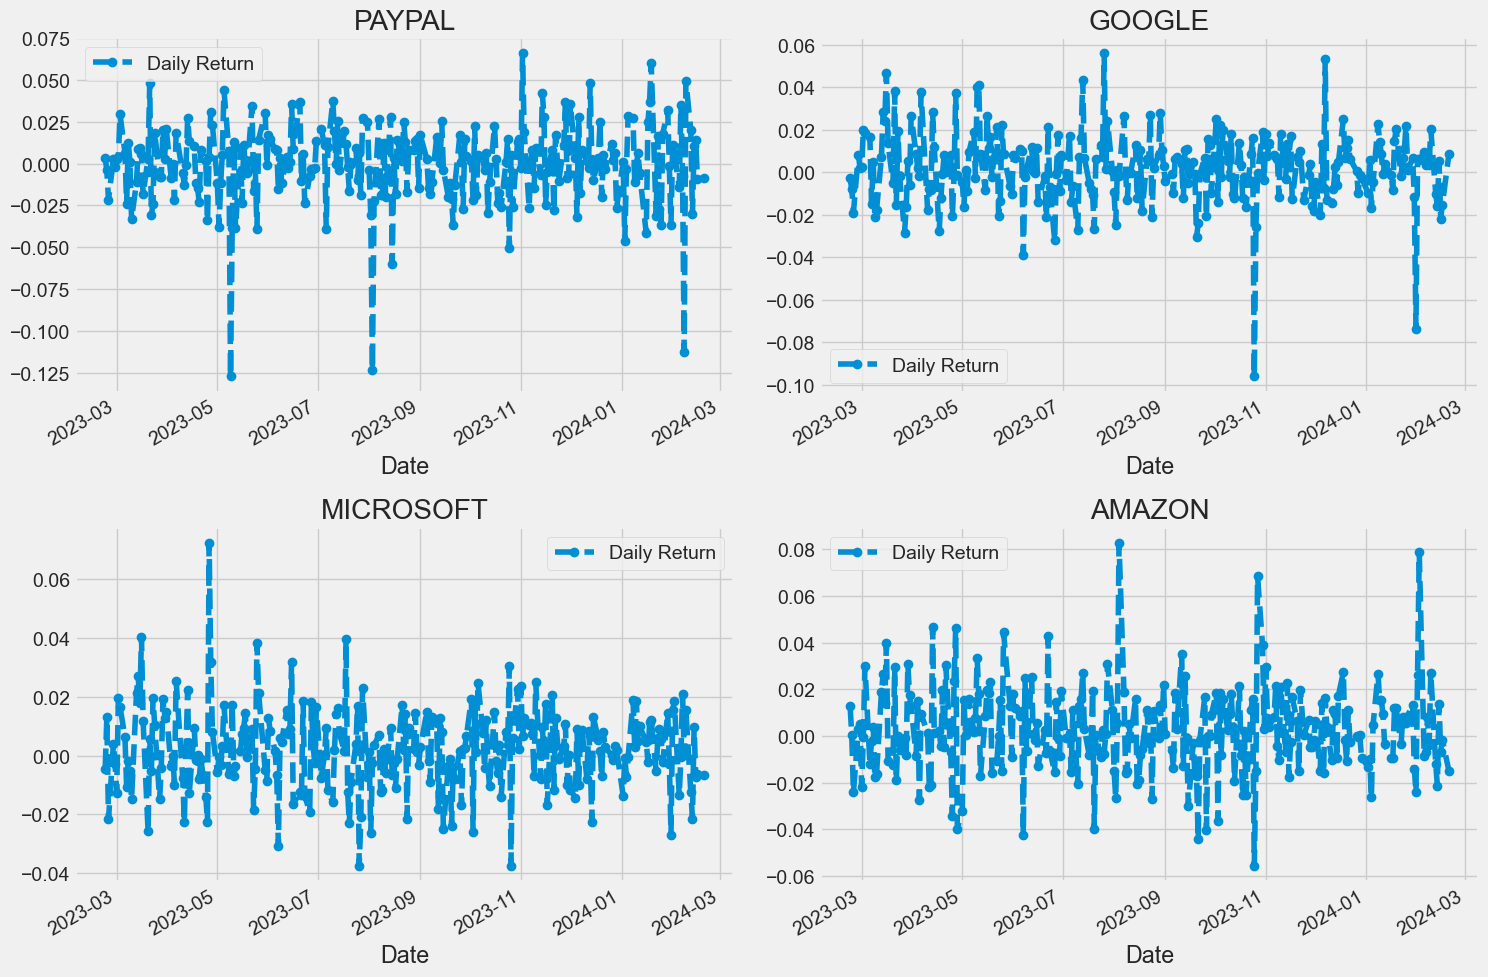

In [50]:
# pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

PYPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('PAYPAL')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

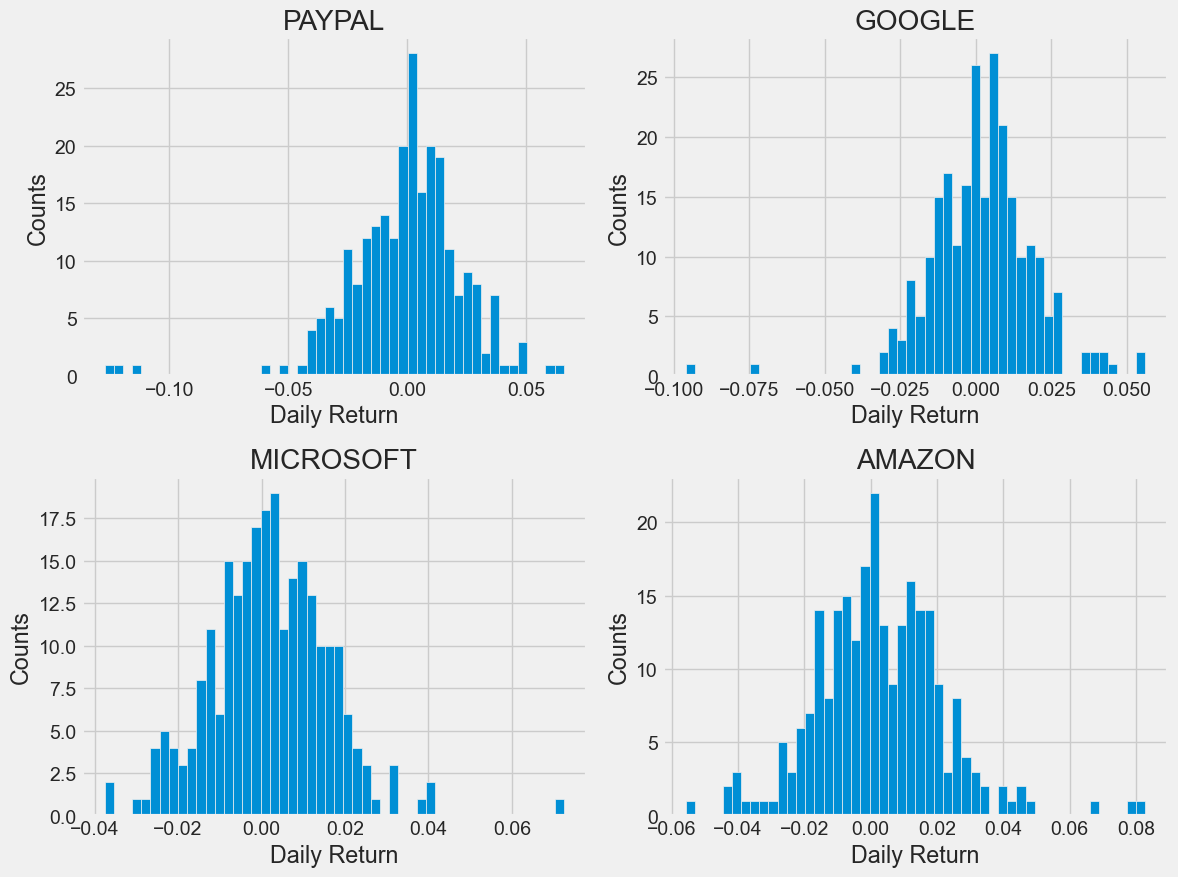

In [51]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [52]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AMZN,GOOG,MSFT,PYPL
Date,,,,
2023-02-21,NaN,NaN,NaN,NaN
2023-02-22,0.012793,-0.002716,-0.004591,0.003190
2023-02-23,0.000313,-0.007952,0.012962,-0.003842
2023-02-24,-0.024212,-0.018887,-0.021784,-0.021811
2023-02-27,0.002781,0.008394,0.003772,0.002991


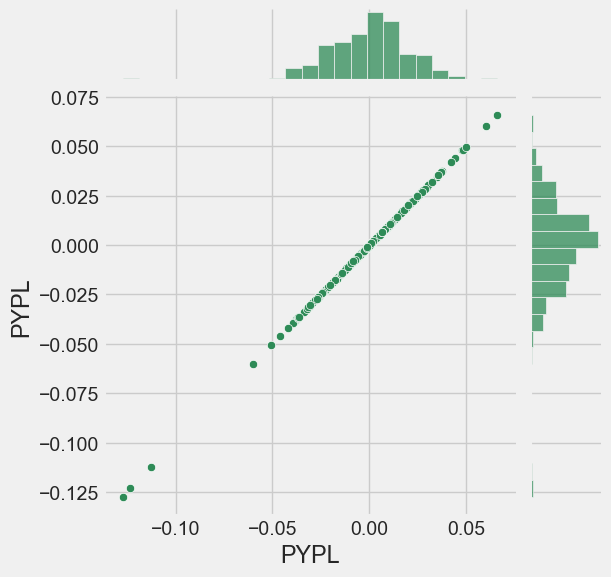

In [53]:
# Comparing Paypal to itself should show a perfectly linear relationship
sns.jointplot(x='PYPL', y='PYPL', data=tech_rets, kind='scatter', color='seagreen')

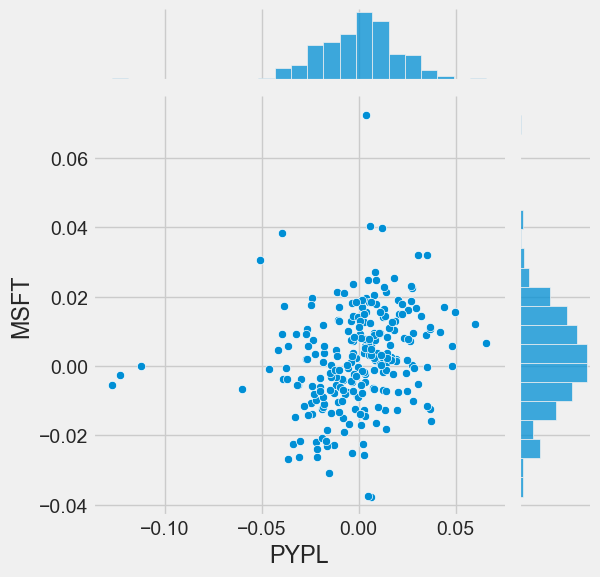

In [54]:
# compare the daily returns of Paypal and Microsoft
sns.jointplot(x='PYPL', y='MSFT', data=tech_rets, kind='scatter')

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


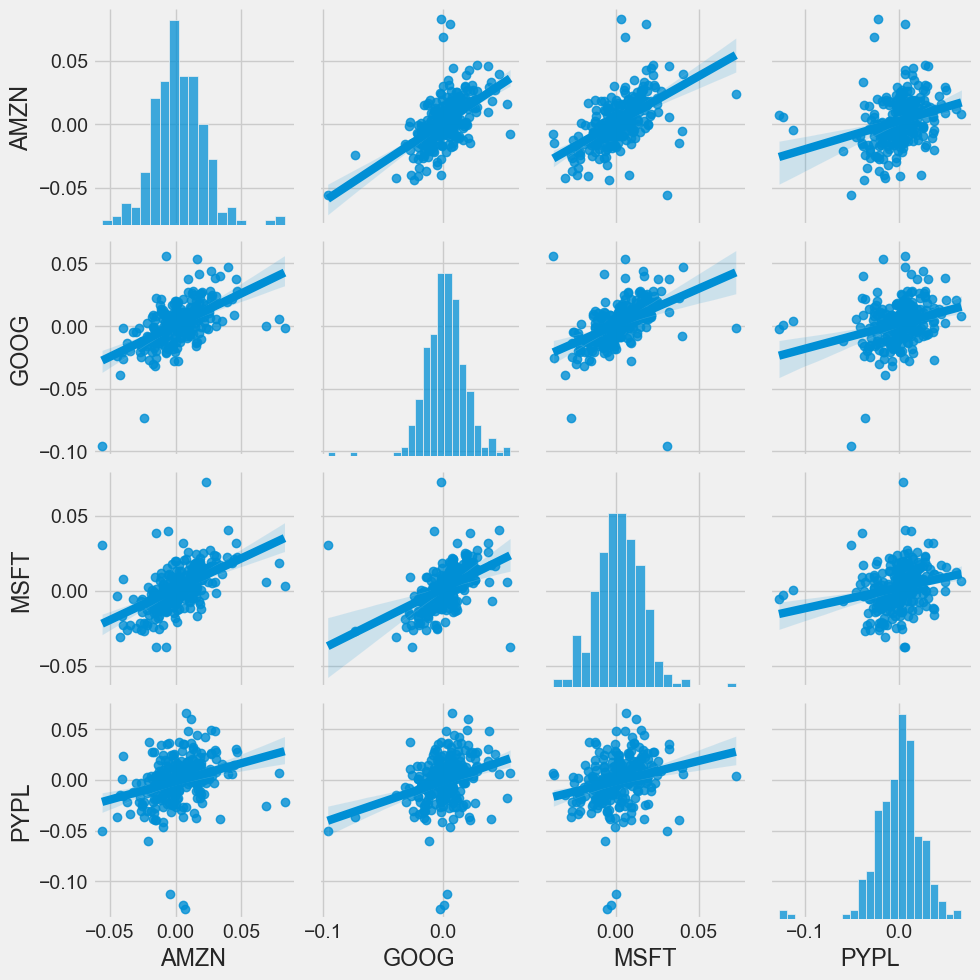

In [55]:
# call pairplot on our DataFrame for an automatic visual analysis 
sns.pairplot(tech_rets, kind='reg')

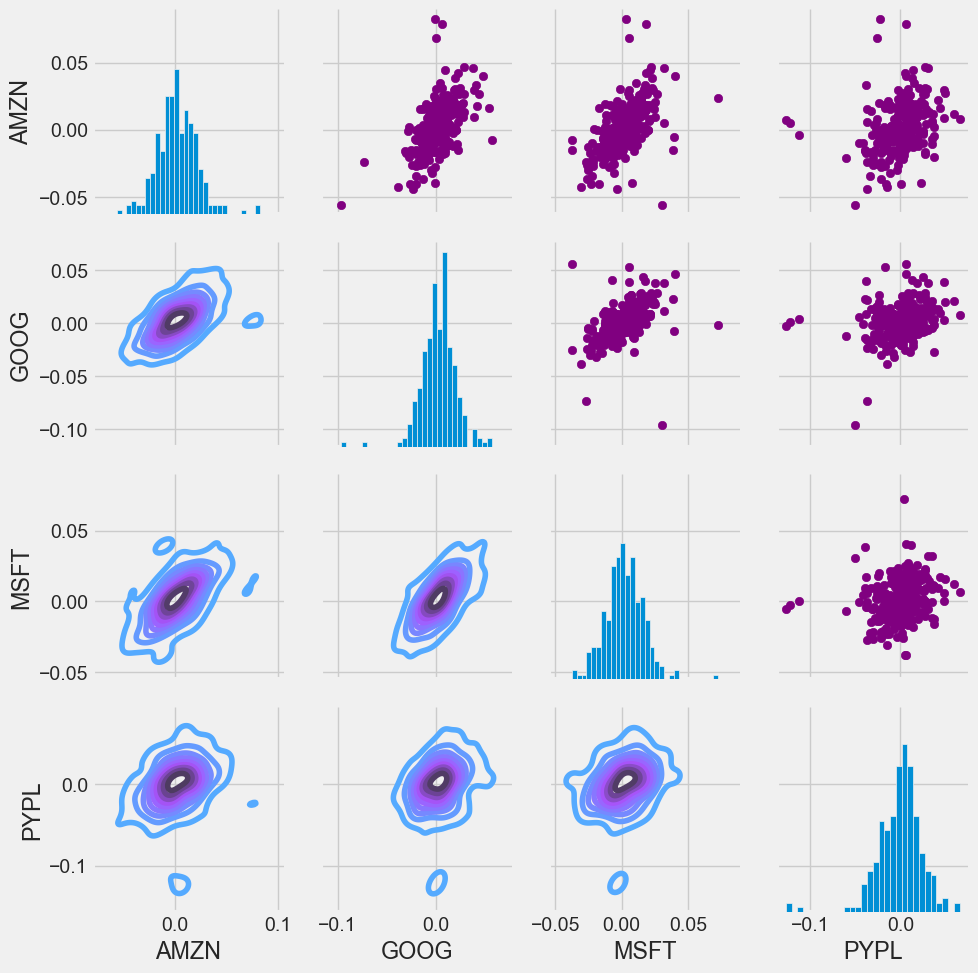

In [56]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# specify the upper triangle.
return_fig.map_upper(plt.scatter, color='purple')

# define the lower triangle in the figure, inclufing the plot type (kde) 
# the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

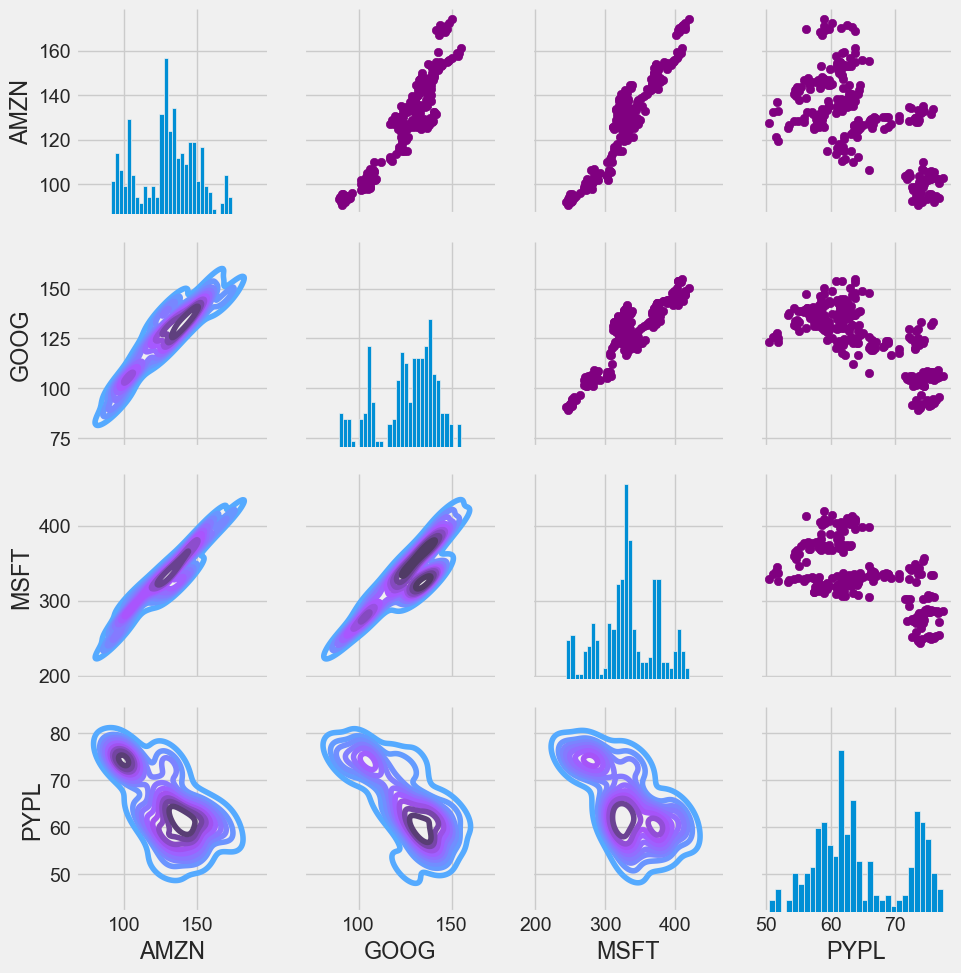

In [57]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

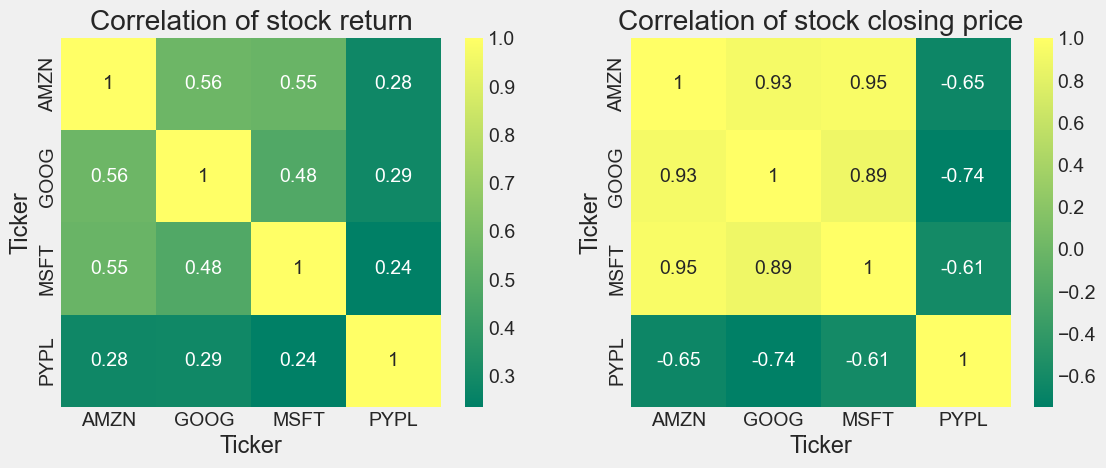

In [58]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

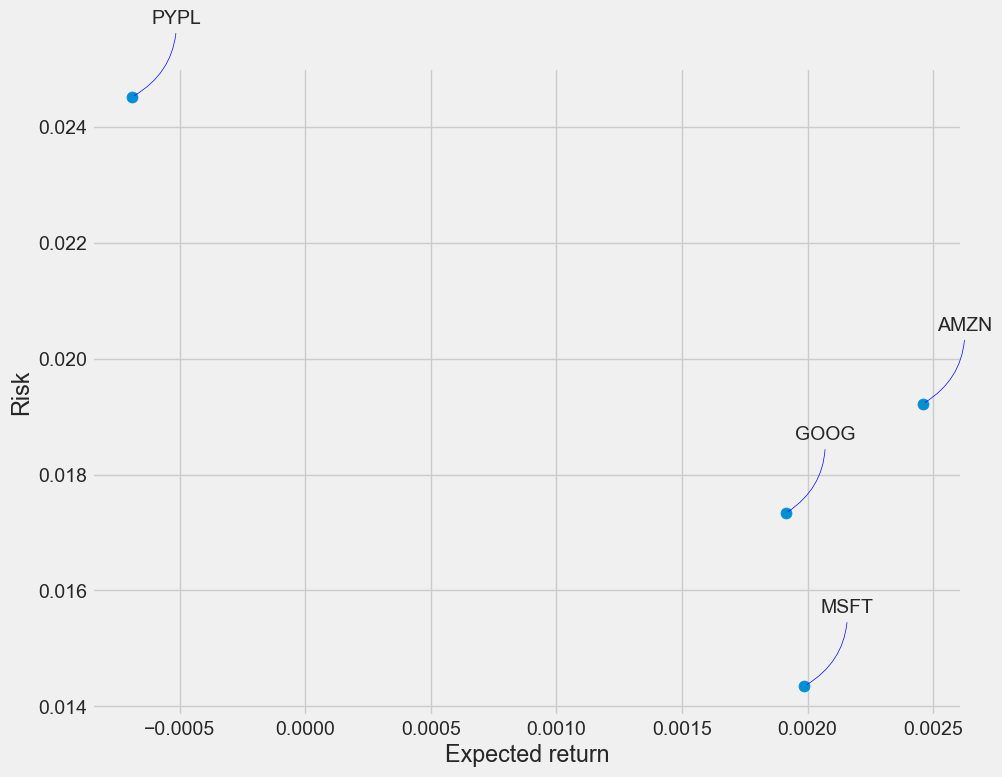

In [59]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [60]:
# Get the stock quote
df = pdr.get_data_yahoo('PYPL', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-06,38.000000,39.750000,36.000000,36.709999,36.709999,5866600
2015-07-07,37.720001,37.810001,36.000000,36.619999,36.619999,7359000
2015-07-08,36.340000,36.360001,34.529999,34.700001,34.700001,5387700
2015-07-09,35.099998,35.520000,33.990002,34.500000,34.500000,3760100
2015-07-10,34.660000,35.189999,33.980000,34.689999,34.689999,4472800
...,...,...,...,...,...,...
2024-02-13,57.880001,58.730000,57.860001,58.259998,58.259998,19540200
2024-02-14,58.595001,59.014999,57.630001,58.869999,58.869999,16520600
2024-02-15,58.860001,60.244999,58.060001,59.700001,59.700001,13321000


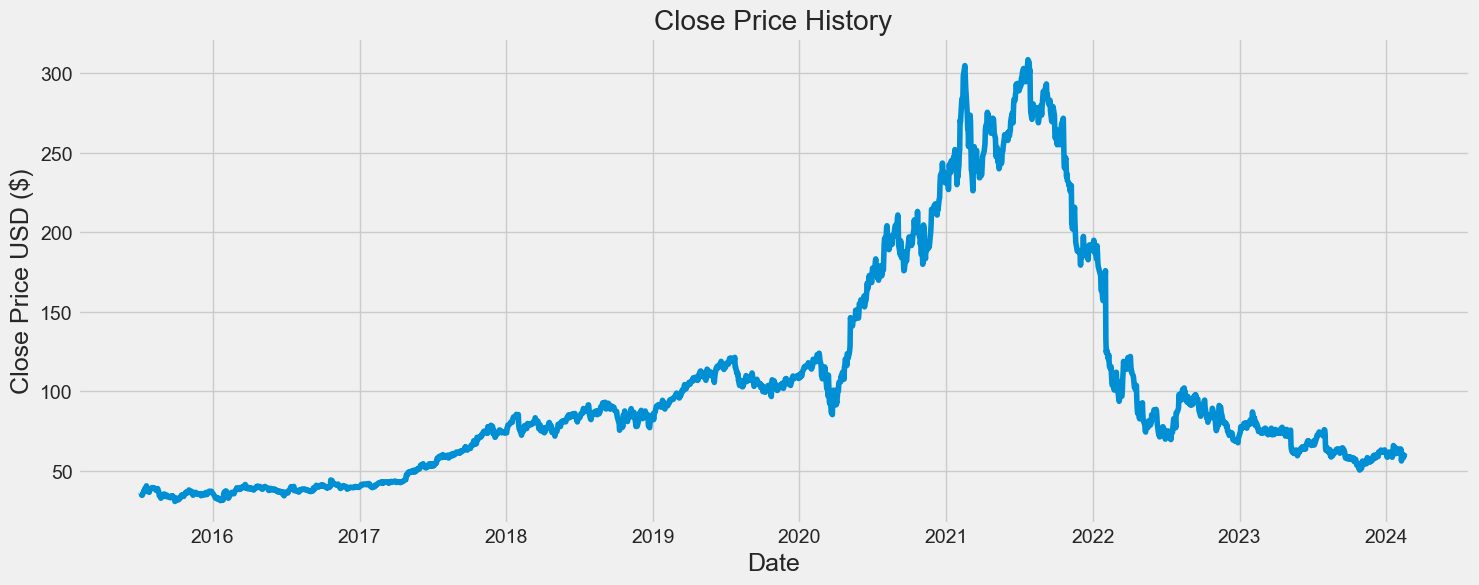

In [61]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [62]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2064

In [63]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02187837],
       [0.02155452],
       [0.01464556],
       ...,
       [0.10460598],
       [0.10259086],
       [0.1008996 ]])

In [64]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02187837, 0.02155452, 0.01464556, 0.01392588, 0.01460957,
       0.02213026, 0.02267003, 0.0247571 , 0.02878734, 0.02792371,
       0.03540843, 0.03137819, 0.02792371, 0.0229579 , 0.02292192,
       0.02072688, 0.02508096, 0.02634042, 0.02813962, 0.02903923,
       0.03152213, 0.02993883, 0.03109032, 0.02957898, 0.03058655,
       0.03029867, 0.02957898, 0.02720403, 0.02515293, 0.02702411,
       0.02914718, 0.02648436, 0.02360561, 0.01925153, 0.01302627,
       0.01122706, 0.00744873, 0.00913997, 0.01435768, 0.01586902,
       0.01572508, 0.01129903, 0.01597697, 0.0168406 , 0.01317021,
       0.01464556, 0.01345808, 0.01018352, 0.01050738, 0.01129903,
       0.01140698, 0.01129903, 0.00967974, 0.00824037, 0.01302627,
       0.00978769, 0.01270241, 0.01180281, 0.01129903, 0.00582944])]
[0.0]

[array([0.02187837, 0.02155452, 0.01464556, 0.01392588, 0.01460957,
       0.02213026, 0.02267003, 0.0247571 , 0.02878734, 0.02792371,
       0.03540843, 0.03137819, 0.02792371, 0.022957

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2004/2004 [==============================] - 30s 13ms/step - loss: 0.0016


In [66]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 12ms/step


1.7891723564092659

C:\Users\PC\AppData\Local\Temp\ipykernel_12348\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


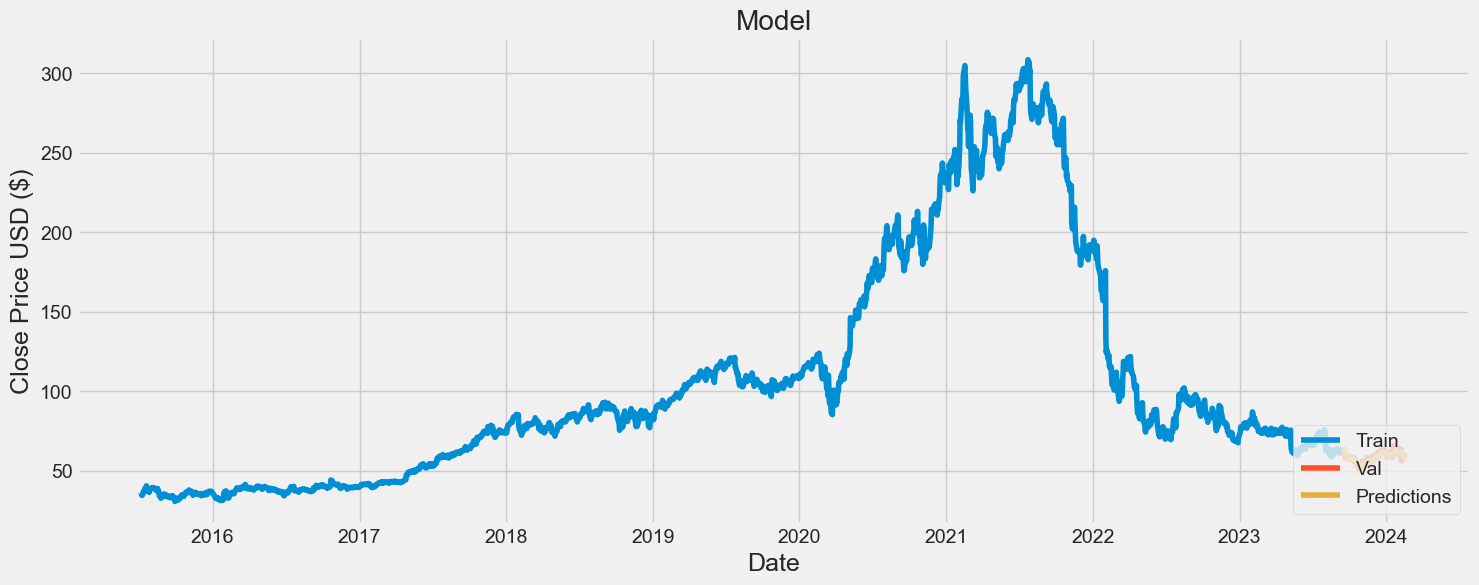

In [67]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [68]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-15,64.209999,61.912033
2023-09-18,62.939999,62.470024
2023-09-19,62.189999,62.659409
2023-09-20,60.860001,62.483154
2023-09-21,58.619999,61.903938
...,...,...
2024-02-13,58.259998,59.112186
2024-02-14,58.869999,58.574989
2024-02-15,59.700001,58.271553
